# **Hospital LOS Prediction**

## **Context:**

Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. **Inefficient distribution of resources like beds, ventilators might lead to a lot of complications**. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chances of recovery. The rooms and bed can also be planned in accordance with that.

**HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system.** They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.**

## **Objective:**

As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out **what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient** using the data available during admission and after running a few tests. Also, **bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.**

## **Data Dictionary:**

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor , BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error


import warnings
warnings.filterwarnings('ignore')

#pandas display change
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
data = pd.read_csv('/content/Dataset - Hospital LOS Prediction.csv')

In [3]:
data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [4]:
data.shape

(500000, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

In [6]:
data['patientid'].value_counts()

,count
patientid,
44572,21
125695,21
126623,21
126719,21
125664,19
...,...
53872,1
121277,1
97293,1


In [7]:
data.drop(columns=['patientid'], inplace=True)

In [8]:
data

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,gynecology,F,Dr Sarah,2,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.795901,10
499996,13,gynecology,F,Dr Olivia,8,31-40,Female,Emergency,Moderate,Other,2,No,4631.550257,11
499997,2,gynecology,B,Dr Sarah,3,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930075,8
499998,2,radiotherapy,A,Dr John,1,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.127772,23


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


In [11]:
cat_col = ['Department', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age' , 'gender' , 'Insurance' , 'doctor_name']
for column in cat_col:
  print(data[column].value_counts(1))
  print('_'*50)

Department
gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: proportion, dtype: float64
__________________________________________________
Ward_Facility_Code
F    0.241076
D    0.238110
B    0.207770
E    0.190748
A    0.093102
C    0.029194
Name: proportion, dtype: float64
__________________________________________________
Type of Admission
Trauma       0.621072
Emergency    0.271568
Urgent       0.107360
Name: proportion, dtype: float64
__________________________________________________
Severity of Illness
Moderate    0.560394
Minor       0.263074
Extreme     0.176532
Name: proportion, dtype: float64
__________________________________________________
Age
21-30     0.319586
31-40     0.266746
41-50     0.160812
11-20     0.093072
61-70     0.053112
51-60     0.043436
71-80     0.037406
81-90     0.016362
0-10      0.006736
91-100    0.002732
Name: proportion, dtype: float64
_

In [12]:
def histogram_boxplot(data , feature , figsize=(12,7) , kde = True , bins = None):
  figure , (ax_box, ax_hist) = plt.subplots(2 , sharex=True , figsize=figsize)
  sns.boxplot(data=data , x=feature , ax=ax_box , showmeans=True , color='violet')
  if bins==None:
    sns.histplot(data=data , x=feature , kde=kde , ax=ax_hist)
  else:
    sns.histplot(data=data , x=feature , kde=kde , ax=ax_hist , bins=bins)
  ax_hist.axvline(data[feature].mean() , color='green' , linestyle='--')
  ax_hist.axvline(data[feature].median() , color='blue' , linestyle='-')


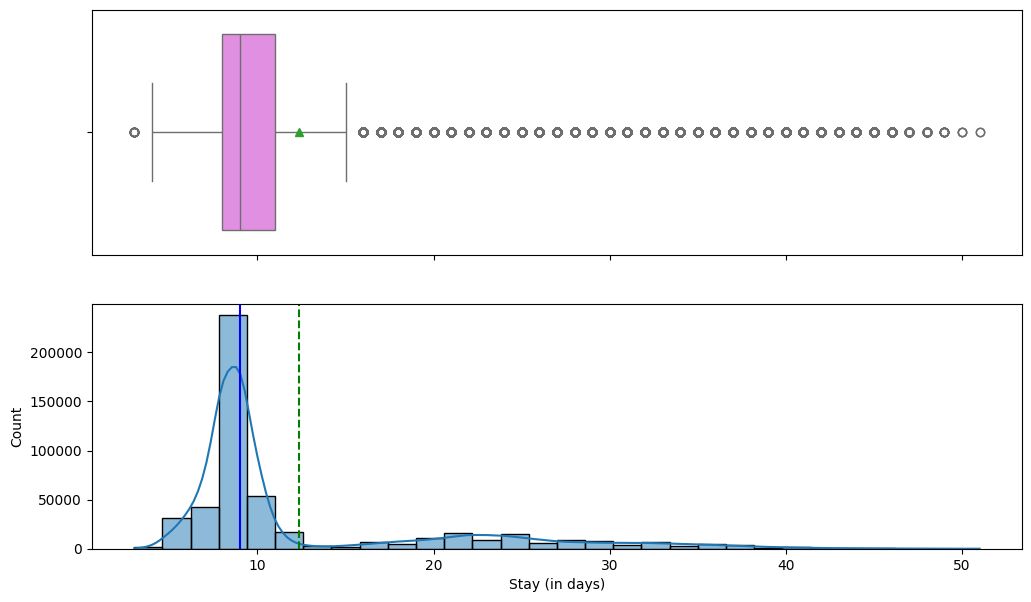

In [13]:
histogram_boxplot(data , "Stay (in days)", bins=30)

**The length of stay in a hospital is analyzed using the histogram_boxplot function. The analysis reveals that the median stay is around eight days, while the mean is approximately 12 days, indicating a right-skewed distribution due to outliers. These outliers include patients who stayed for significantly longer periods, such as 33 or 51 days. Understanding this distribution is crucial for hospital management, as it highlights the need to anticipate and manage resources for patients with extended stays, which can impact hospital operations and planning.**


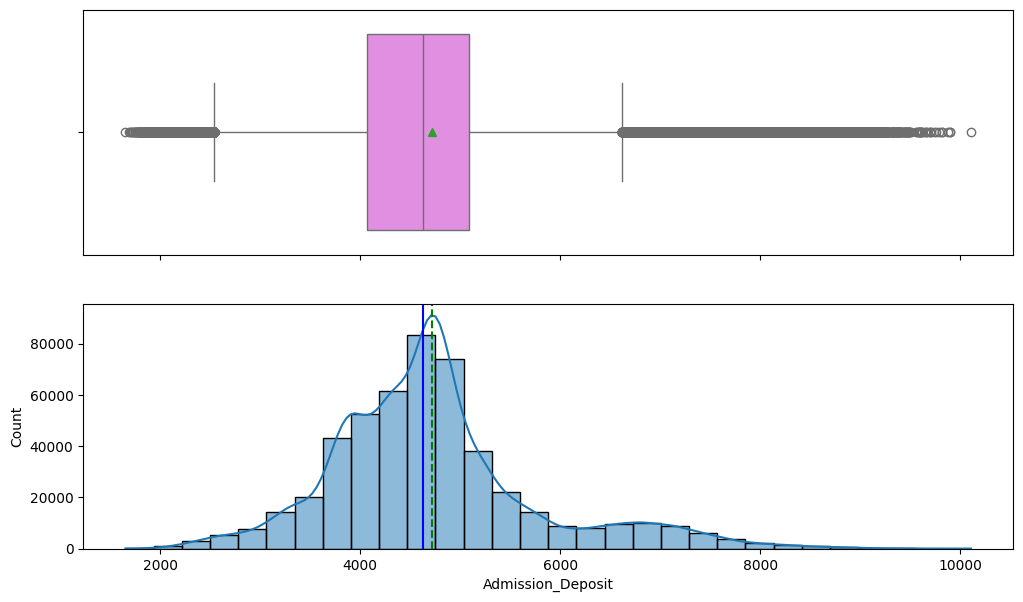

In [14]:
histogram_boxplot(data , "Admission_Deposit" , bins=30)

**Admission deposits are analyzed to understand the financial aspect of hospital admissions. The median deposit is around 4,800 to 5,000, with amounts above 6,500 and below 2,500 considered outliers. The distribution appears normal, with the mean and median closely aligned, indicating little skewness. However, extreme values, such as deposits of $10,000, are noted. This analysis helps in understanding the typical financial burden on patients and can inform hospital policies regarding deposit requirements and financial planning.**

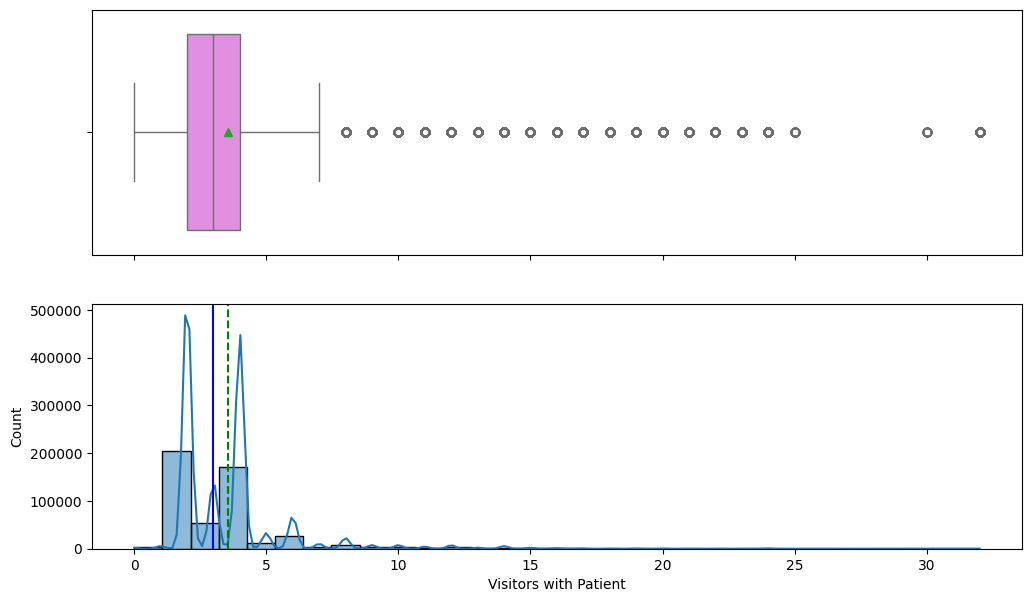

In [15]:
histogram_boxplot(data , "Visitors with Patient" , bins=30)

**The number of visitors accompanying patients is analyzed, revealing a bimodal distribution. The first mode is around two visitors, and the second is around four. Values above seven visitors are considered outliers, with some cases showing as many as 30 visitors. This distribution is skewed to the right, indicating that while most patients have a few visitors, some have significantly more. Understanding visitor patterns is important for hospital management, as it can affect space allocation, visitor policies, and overall patient experience.**

In [16]:
data.select_dtypes(include=np.number).corr()

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days)
Available Extra Rooms in Hospital,1.000000,-0.001784,0.070459,-0.050127,-0.019219
staff_available,-0.001784,1.000000,0.000578,0.000763,0.007398
Visitors with Patient,0.070459,0.000578,1.000000,-0.069043,0.027302
Admission_Deposit,-0.050127,0.000763,-0.069043,1.000000,0.044203
Stay (in days),-0.019219,0.007398,0.027302,0.044203,1.000000


<Axes: >

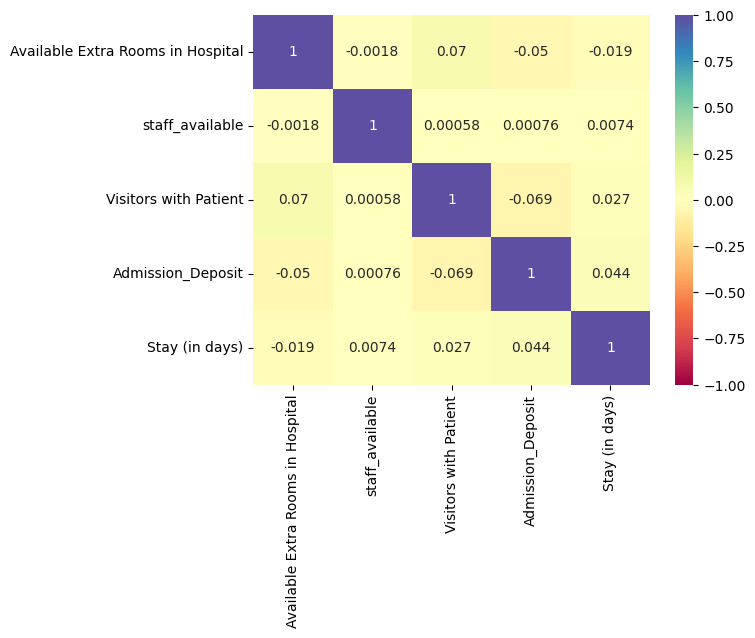

In [17]:
sns.heatmap(data.select_dtypes(include=np.number).corr() , annot=True , cmap='Spectral' , vmin=-1 , vmax=1)

**Interpreting the values in a correlation matrix is crucial for understanding the relationships between variables. In a correlation matrix, the diagonal values are always 1, indicating a perfect positive correlation of each variable with itself. Other values in the matrix represent the correlation between different variables. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. Values near zero suggest no correlation. In the given data set, the highest correlation observed is 0.07 between the number of visitors and the number of extra rooms available in a hospital, indicating a very weak positive correlation. Significant correlations are typically considered to be above 0.5. The heatmap visualization helps in quickly identifying these relationships, with colors representing different levels of correlation: yellow for no correlation, red for perfect negative correlation, and blue for perfect positive correlation. This visual representation aids in identifying patterns and potential areas of interest for further analysis.**


<Axes: xlabel='Stay (in days)', ylabel='Ward_Facility_Code'>

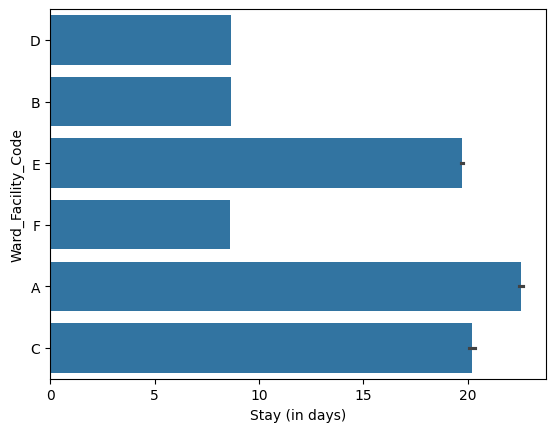

In [18]:
sns.barplot(x='Stay (in days)' , y='Ward_Facility_Code' , data=data)

**Analyzing categorical variables involves examining the distribution and relationship of these variables with other factors. A barplot is a useful tool for this purpose, as it visually represents the frequency or average of a categorical variable. In this analysis, the 'barplot()' function from Seaborn is used to explore the relationship between the length of hospital stays and different ward facility codes. By setting the x-axis to the dependent variable, 'Stay (in days)', and the y-axis to the categorical variable, 'Ward_Facility_Code', the barplot reveals that wards D, B, and F have the shortest average stays, around 8 days, while wards E, A, and C have longer stays, averaging 20 days. This suggests a significant difference in patient stay durations across different wards, which could be further explored by considering additional variables like department or severity of illness. Such analysis helps in understanding the operational dynamics of hospital wards and can inform resource allocation and management decisions.**


In [19]:
def stacked_barplot (data, predcictor , target):
  count = data[predcictor].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[predcictor] , data[target]).sort_values(by=sorter , ascending=False)
  print(tab1)
  tab = pd.crosstab(data[predcictor] , data[target] , normalize='index').sort_values(by=sorter , ascending=False)
  tab.plot(kind='bar' , stacked=True , figsize=(count+1 , 5))
  plt.legend(loc='upper left' , bbox_to_anchor=(1 , 1))


--------------------
## Creating Stacked Barplots for Categorical Analaysis
--------------------

**Stacked barplots are an effective way to analyze the combined effect of two categorical variables on a dependent variable. By visualizing the distribution of one categorical variable within the levels of another, insights into complex relationships can be gained. In this analysis, a function is created to generate stacked barplots, allowing for repeated use with different data sets. The function takes a data frame, a predictor (one categorical variable), and a target (another categorical variable) as inputs. For example, using 'Ward_Facility_Code' as the predictor and 'Department' as the target, the stacked barplot reveals the distribution of patients across different wards and departments. This visualization helps in identifying patterns, such as certain wards being associated with specific departments, which can be crucial for hospital management and planning. The use of cross-tabulation further enhances this analysis by providing a detailed count of patients in each category, facilitating a deeper understanding of the data.**

--------------------
## Cross Tabulation
--------------------

**Cross tabulation is a method used to quantitatively analyze the relationship between multiple variables. It involves creating a matrix, or crosstab, that displays the frequency distribution of variables. In this analysis, cross tabulation is used to examine the relationship between 'Ward_Facility_Code' and 'Department'. By using the Pandas library, a crosstab is created that shows the count of patients in each ward and department combination. This method allows for sorting based on specific criteria, such as the least frequent level in the target variable, providing insights into less common occurrences. The crosstab can be visualized using a stacked barplot, which helps in understanding the distribution and interaction of categorical variables. This approach is particularly useful in identifying trends and patterns that may not be immediately apparent, aiding in decision-making and strategic planning.**

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  \
Ward_Facility_Code                                                             
A                                 4709       15611           0         21093   
B                                    0           0      103885             0   
C                                 1319        4199           0          9079   
D                                    0           0      119055             0   
E                                16862       24369           0         54143   
F                                    0           0      120538             0   

Department          surgery  
Ward_Facility_Code           
A                      5138  
B                         0  
C                         0  
D                         0  
E                         0  
F                         0  


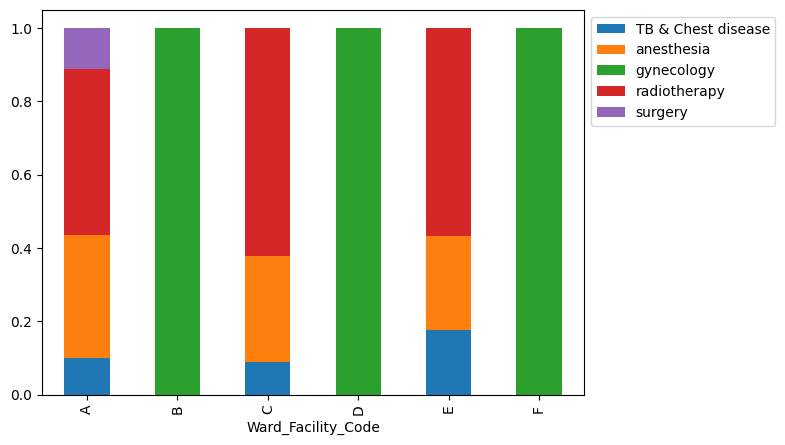

In [20]:
stacked_barplot(data , 'Ward_Facility_Code' , 'Department')

Severity of Illness  Extreme  Minor  Moderate
Ward_Facility_Code                           
D                      29549  27220     62286
B                      24222  23579     56084
A                      13662   7877     25012
E                      11488  22254     61632
F                       5842  47594     67102
C                       3503   3013      8081


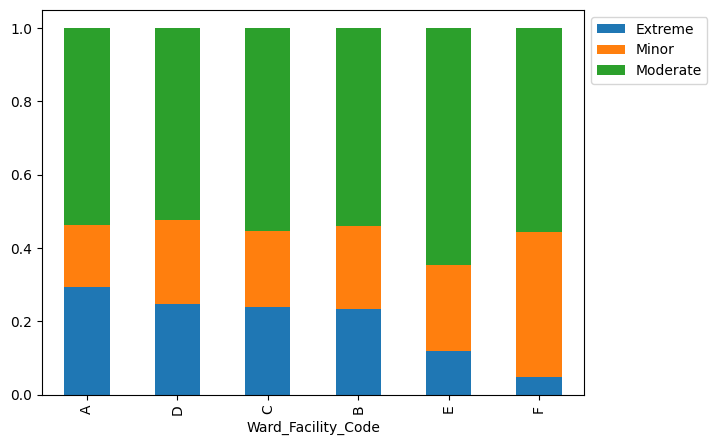

In [21]:
stacked_barplot(data , 'Ward_Facility_Code' , 'Severity of Illness')

**The analysis of ward and department data reveals insights into the specialization and patient distribution across different wards. For instance, wards B, D, and F are dedicated to gynecological patients, while wards A, C, and E serve multiple purposes, including radiotherapy and surgery. This categorization helps in understanding the nature of each ward and the types of patients they accommodate. The length of stay in these wards varies, with multipurpose wards having longer stays due to treatments like radiotherapy, while gynecology wards have shorter stays, likely due to routine checkups and faster treatments.**

<Axes: xlabel='Stay (in days)', ylabel='Age'>

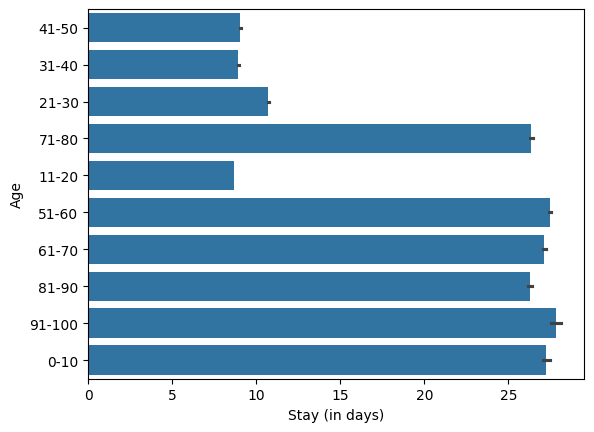

In [22]:
sns.barplot(x='Stay (in days)' , y='Age' , data=data)


**Age significantly influences the length of hospital stay, with younger adults and middle-aged individuals (ages 11-50) having the shortest stays, typically around 7-12 days. In contrast, older adults (ages 61-100) and very young children (ages 0-10) tend to stay longer, often exceeding 25 days. This pattern suggests that older patients may require extended care due to chronic conditions, while young children might be undergoing long-term treatments like radiotherapy for cancer. Understanding these age-related trends is crucial for hospital resource planning and patient care strategies.**

In [23]:
data.groupby(['doctor_name'])['Department'].agg(Department_name='unique', Patients_Treated='count')

,Department_name,Patients_Treated
doctor_name,,
Dr Isaac,[surgery],3359
Dr John,"[TB & Chest disease, anesthesia, radiotherapy]",51263
Dr Mark,"[anesthesia, TB & Chest disease]",44410
Dr Nathan,[gynecology],70777
Dr Olivia,[gynecology],98352
Dr Sam,[radiotherapy],55711
Dr Sarah,[gynecology],99596
Dr Simon,[surgery],1779
Dr Sophia,[gynecology],74753


**This analysis reveals patterns, such as surgeons seeing fewer patients compared to doctors in gynecology, who handle a larger patient volume. Such insights are valuable for understanding workload distribution among doctors and optimizing hospital operations.**

**The `pandas.get_dummies` function can be optimized by specifying which columns to convert into dummy variables. This is particularly useful when the dataset includes non-numeric variables like dates or patient names, which should not be one-hot encoded. By selecting only the relevant categorical variables, unnecessary complexity is avoided. The function `select_dtypes` can be used to filter out columns of object or category data types, ensuring only these are transformed. This approach prevents the creation of an excessive number of dummy variables, which can occur if every unique value in a non-categorical column is encoded.**

In [24]:
data = pd.get_dummies(
    data,
    columns=data.select_dtypes(include=['object','category']).columns.tolist(),
    drop_first=True
)

In [25]:
data

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Male,gender_Other,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_Other,Insurance_Yes
0,4,0,4,2966.408696,8,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,4,2,2,3554.835677,9,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False
2,2,8,2,5624.733654,7,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
3,4,7,4,4814.149231,8,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,2,10,2,5169.269637,34,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,2,3,4105.795901,10,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False
499996,13,8,2,4631.550257,11,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
499997,2,3,2,5456.930075,8,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
499998,2,1,2,4694.127772,23,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False


**Splitting the dataset into training and testing sets is a fundamental step in machine learning. The training set is used to train the model, while the test set is used to evaluate its performance on unseen data. This process helps in assessing how well the model generalizes. The `train_test_split` function from scikit-learn is commonly used for this purpose. It randomly divides the dataset into training and testing subsets, ensuring that the model is trained on one portion of the data and tested on another, which is crucial for validating the model's predictive power.**

In [26]:
x = data.drop(columns=['Stay (in days)'], axis=1)
y = data['Stay (in days)']

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=1 , shuffle=True)

In [28]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((400000, 41), (100000, 41), (400000,), (100000,))

**In data preparation, splitting the dataset into training and testing sets is crucial for evaluating model performance. The train-test split function divides the dataset into two parts: one for training the model and the other for testing its accuracy. The proportion of the test set is specified by the 'test size' parameter, which in this example is set to 20%, meaning 100,000 out of 500,000 examples are used for testing, and the remaining 400,000 for training. The 'shuffle' parameter, when set to True, ensures that the data is randomly shuffled before splitting, which helps in creating a more generalized model by preventing any order bias. Setting 'random_state' to a fixed number, like 1, ensures that the split is reproducible, meaning the same train and test sets are generated every time the code is run. This reproducibility is essential for consistent model evaluation and comparison.**

**To evaluate model performance effectively, a function is created to calculate various metrics such as R-squared, adjusted R-squared, mean absolute error, mean squared error, root mean squared error, and mean absolute percentage error. These metrics provide insights into the model's accuracy and reliability. R-squared measures the proportion of variance explained by the model, while adjusted R-squared accounts for the number of predictors, providing a more accurate measure when multiple variables are involved. Mean absolute error and root mean squared error give an average of the errors in prediction, with the latter being more sensitive to outliers. Mean absolute percentage error offers a pseudo accuracy measure for regression tasks, indicating the average percentage error between predictions and actual values. These metrics collectively help in understanding the model's performance and areas for improvement**.


In [29]:
def adj_r2_score(predcictors , targets , predictions):
  r2 = r2_score(targets , predictions)
  n = predcictors.shape[0]
  k = predcictors.shape[1]
  adj_r2 = 1 - (1-r2)* ((n-1)/(n-k-1))
  return adj_r2

**Mean Absolute Percentage Error (MAPE) is a metric used to evaluate the accuracy of regression models. It calculates the average absolute percentage difference between predicted and actual values, providing a scale of 0 to 100. MAPE is particularly useful because it offers a pseudo accuracy measure for regression tasks, where traditional accuracy metrics are not applicable. By expressing errors as percentages, MAPE allows for easy interpretation and comparison across different models and datasets. This metric is valuable for understanding the model's performance in practical, real-world terms.**


In [30]:
def mape_score(targets , predictions):
  return np.mean(np.abs((targets - predictions) / targets) * 100)

**A comprehensive function named 'model_performance_regression' is developed to evaluate the performance of regression models. This function takes a trained model, predictors, and target values as inputs and calculates various performance metrics, including R-squared, adjusted R-squared, root mean squared error, mean absolute error, and mean absolute percentage error. The function leverages the uniform syntax of scikit-learn models, allowing it to be used across different model types like decision trees, random forests, and K Nearest Neighbors. By standardizing the evaluation process, this function facilitates consistent and interpretable model performance assessment, aiding in model selection and improvement.**

In [31]:
def model_performance_regression(model , predictors , target):
  pred = model.predict(predictors)
  r2 = r2_score(target , pred)
  adjr2 = adj_r2_score(predictors , target , pred)
  rmse = np.sqrt(mean_squared_error(target , pred))
  mae = mean_absolute_error(target , pred)
  mape = mape_score(target , pred)

  def_perf = pd.DataFrame(
      {
          'r2' : [r2],
          'adj_r2' : [adjr2],
          'rmse' : [rmse],
          'mae' : [mae],
          'mape' : [mape]
      },
      index = [0]
  )
  return def_perf

**Training a decision tree regressor involves creating an instance of the DecisionTreeRegressor class, which can be configured with various hyperparameters such as min_samples_split, min_samples_leaf, and max_features. These parameters control the tree's growth and complexity. For initial training, default hyperparameters can be used, with a specified random state to ensure reproducibility. The model is then fitted to the training data, allowing it to learn the underlying patterns and relationships.**


In [32]:
dt_regressor = DecisionTreeRegressor(random_state=1)
dt_regressor.fit(x_train , y_train)

DecisionTreeRegressor(random_state=1)

**After training, the decision tree regressor's performance is evaluated using metrics such as root mean squared error (RMSE), mean absolute error (MAE), R-squared, adjusted R-squared, and mean absolute percentage error (MAPE). These metrics provide insights into the model's accuracy and error rates. For instance, an RMSE of 1.81 and an MAE of 1.13 indicate the average prediction error, while an R-squared of 95% suggests a high level of explained variance. MAPE, being a percentage error, is ideally low, indicating the model's precision relative to the target values.**

In [33]:
dt_regressor_perf_test = model_performance_regression(dt_regressor , x_test , y_test)
dt_regressor_perf_test

,r2,adj_r2,rmse,mae,mape
0,0.947324,0.947302,1.821321,1.13127,9.353216


In [34]:
features = list(x.columns)
features

['Available Extra Rooms in Hospital',
 'staff_available',
 'Visitors with Patient',
 'Admission_Deposit',
 'Department_anesthesia',
 'Department_gynecology',
 'Department_radiotherapy',
 'Department_surgery',
 'Ward_Facility_Code_B',
 'Ward_Facility_Code_C',
 'Ward_Facility_Code_D',
 'Ward_Facility_Code_E',
 'Ward_Facility_Code_F',
 'doctor_name_Dr John',
 'doctor_name_Dr Mark',
 'doctor_name_Dr Nathan',
 'doctor_name_Dr Olivia',
 'doctor_name_Dr Sam',
 'doctor_name_Dr Sarah',
 'doctor_name_Dr Simon',
 'doctor_name_Dr Sophia',
 'Age_11-20',
 'Age_21-30',
 'Age_31-40',
 'Age_41-50',
 'Age_51-60',
 'Age_61-70',
 'Age_71-80',
 'Age_81-90',
 'Age_91-100',
 'gender_Male',
 'gender_Other',
 'Type of Admission_Trauma',
 'Type of Admission_Urgent',
 'Severity of Illness_Minor',
 'Severity of Illness_Moderate',
 'health_conditions_Diabetes',
 'health_conditions_Heart disease',
 'health_conditions_High Blood Pressure',
 'health_conditions_Other',
 'Insurance_Yes']

****One of the key advantages of decision trees is their interpretability, which allows for visualization of the decision-making process. By plotting the tree, one can observe where splits occur based on features such as department, age, or other relevant variables. This visualization helps identify the most important factors influencing predictions, making decision trees particularly useful when understanding the model's internal workings is crucial. Despite potentially lower performance compared to more complex models like random forests, the clarity and transparency of decision trees make them valuable for interpretative purposes.**

In [35]:
dt_regressor_visualize = DecisionTreeRegressor(random_state=1 , max_depth=3)
dt_regressor_visualize.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

**To effectively visualize a decision tree, a shallow tree with a limited depth is often trained. This is because deep trees with many levels can be difficult to interpret visually. By setting a maximum depth, such as 3, the tree becomes more manageable and easier to display. The shallow tree is trained on the same data, and once trained, it can be visualized using plotting functions. This approach allows for a clear representation of the decision paths and feature importance, aiding in the understanding of the model's decision-making process.**

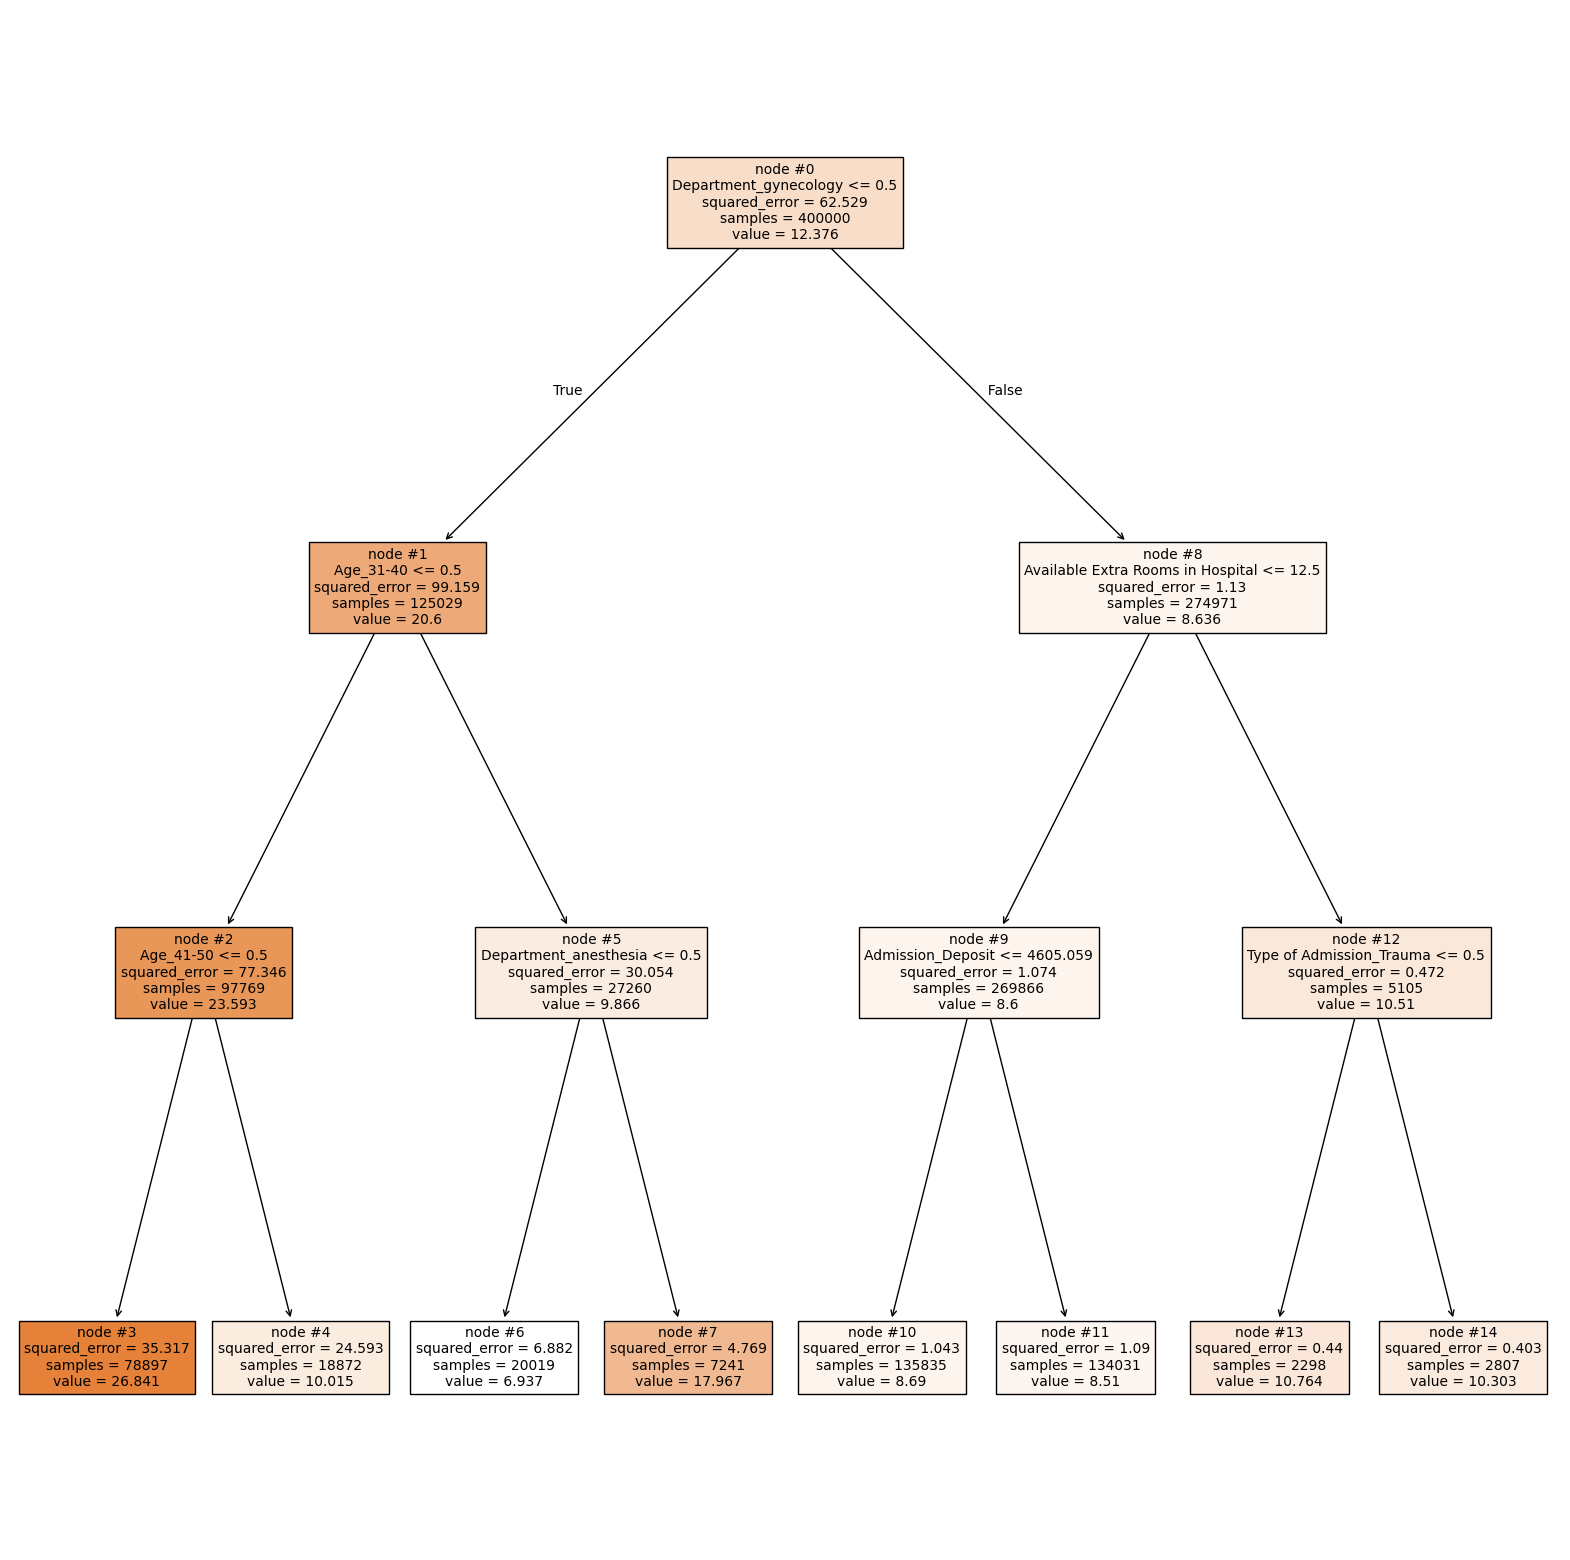

In [36]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_regressor_visualize , feature_names=features , filled=True , fontsize=10 , node_ids=True , class_names=True);

**Decision trees can be represented visually in different ways to aid interpretation. One method is to display the tree as text, which can be more readable for some users. This representation clearly shows the decision points and the paths taken based on the conditions set at each node. For example, a condition like Department_gynecology < 0.5 directs the path one way, while > 0.5 directs it another. This textual representation can be particularly useful for understanding the logic behind the tree's decisions and for debugging or explaining the model's behavior to stakeholders.**

In [37]:
print(tree.export_text(dt_regressor_visualize , feature_names=features , show_weights=True))

|--- Department_gynecology <= 0.50
|   |--- Age_31-40 <= 0.50
|   |   |--- Age_41-50 <= 0.50
|   |   |   |--- value: [26.84]
|   |   |--- Age_41-50 >  0.50
|   |   |   |--- value: [10.02]
|   |--- Age_31-40 >  0.50
|   |   |--- Department_anesthesia <= 0.50
|   |   |   |--- value: [6.94]
|   |   |--- Department_anesthesia >  0.50
|   |   |   |--- value: [17.97]
|--- Department_gynecology >  0.50
|   |--- Available Extra Rooms in Hospital <= 12.50
|   |   |--- Admission_Deposit <= 4605.06
|   |   |   |--- value: [8.69]
|   |   |--- Admission_Deposit >  4605.06
|   |   |   |--- value: [8.51]
|   |--- Available Extra Rooms in Hospital >  12.50
|   |   |--- Type of Admission_Trauma <= 0.50
|   |   |   |--- value: [10.76]
|   |   |--- Type of Admission_Trauma >  0.50
|   |   |   |--- value: [10.30]



**Ensemble learning is a powerful machine learning technique that combines multiple models to improve performance. Bagging, short for Bootstrap Aggregating, is a popular ensemble method that involves training multiple decision trees on different subsets of the data and averaging their predictions. This approach reduces variance and helps prevent overfitting, as each model is trained on a different portion of the dataset. By aggregating the predictions of multiple models, bagging provides a more robust and accurate prediction than a single decision tree. The process involves creating multiple subsets of the data, training a model on each subset, and then averaging the predictions of all models to make a final decision.**

In [38]:
bagging_estimator = BaggingRegressor(random_state=1)
bagging_estimator.fit(x_train , y_train)

BaggingRegressor(random_state=1)

In [39]:
bagging_estimator_perf_test = model_performance_regression(bagging_estimator , x_test , y_test)
bagging_estimator_perf_test

,r2,adj_r2,rmse,mae,mape
0,0.970434,0.970422,1.364505,0.902326,7.627444


**Bagging significantly improves the performance of machine learning models by reducing overfitting and increasing accuracy. In the example provided, the root mean squared error (RMSE) of a decision tree was reduced from 1.8 to 1.36 when using a bagging estimator. Similarly, the R-squared value increased from 95% to 97%, and the mean absolute percentage error decreased from 9% to 7.6%. These improvements demonstrate the effectiveness of bagging in enhancing model performance by leveraging the collective predictions of multiple models, thereby providing more reliable and accurate results.**


--------------------
## Random Forest
--------------------
**Random Forest is an advanced ensemble learning method that builds upon the principles of bagging. It introduces an additional layer of randomness by selecting a random subset of features for each split in the decision trees, in addition to using different subsets of the data. This approach further reduces the risk of overfitting and increases the model's generalizability. By ensuring that each tree in the forest is trained on different data and features, Random Forests provide a more diverse set of models, leading to more accurate and robust predictions. This method is particularly effective in handling large datasets with many features, as it reduces the likelihood of any single feature dominating the model's predictions.**

In [40]:
rf_regressor = RandomForestRegressor(random_state=1)
rf_regressor.fit(x_train , y_train)

RandomForestRegressor(random_state=1)

In [41]:
rf_regressor_perf_test = model_performance_regression(rf_regressor , x_test , y_test)
rf_regressor_perf_test

,r2,adj_r2,rmse,mae,mape
0,0.973067,0.973056,1.302336,0.863677,7.306138



--------------------
## Ad boost
--------------------

**AdaBoost, or Adaptive Boosting, is introduced as an ensemble method that involves training a set of weak models and improving them over iterations. The technique focuses on training several weak classifiers on subsets of the dataset, identifying instances where the model performs poorly, and assigning more weight to these problematic examples. This approach aims to tackle hard-to-classify or regress examples, improving the model's performance over time. The AdaBoostRegressor can be imported from scikit-learn's ensemble module, similar to the random forest.**

In [42]:
ada_regressor = AdaBoostRegressor(random_state=1)
ada_regressor.fit(x_train , y_train)

AdaBoostRegressor(random_state=1)

In [43]:
ada_regressor_perf_test = model_performance_regression(ada_regressor , x_test , y_test)
ada_regressor_perf_test

,r2,adj_r2,rmse,mae,mape
0,0.910399,0.910363,2.375388,1.58689,13.623722


**The AdaBoostRegressor is instantiated and trained on the x_train and y_train data. It is expected to be faster than the random forest due to training a smaller number of predictors. The model's performance is evaluated using a regression function on the test set. However, the results show that the AdaBoost regressor performs worse than the random forest, with increased RMSE, adjusted R-squared, and MAPE. This indicates that while AdaBoost is a useful method, it may not always outperform other ensemble methods like random forest.**

--------------------
## Gradient Boosting
--------------------


**Gradient Boosting is presented as an improvement over AdaBoost, using the negative gradient to train weak classifiers or regressors. The method involves fitting a subset of data on weak models, calculating the regression error or residual, and fitting the models to these residuals to minimize them over iterations. This iterative process aims to enhance the model's accuracy by reducing errors progressively. The GradientBoostingRegressor is imported from scikit-learn's ensemble module, and the model is instantiated and trained with default hyperparameters, setting the random state for reproducibility.**

In [44]:
grad_regressor = GradientBoostingRegressor(random_state=1)
grad_regressor.fit(x_train , y_train)

GradientBoostingRegressor(random_state=1)

In [45]:
grad_regressor_perf_test = model_performance_regression(grad_regressor , x_test , y_test)
grad_regressor_perf_test

,r2,adj_r2,rmse,mae,mape
0,0.948965,0.948944,1.792721,1.212749,10.247284


**After training, the Gradient Boosting Regressor's performance is evaluated on the test set. It shows improvement over AdaBoost in terms of RMSE and R-squared but still does not match the performance of the random forest. This suggests that while gradient boosting is a powerful method, it may require further enhancements or specific conditions to outperform other models like random forest.**

--------------------
## XGBoost
--------------------

**XGBoost, or Extreme Gradient Boosting, is introduced as an advanced version of gradient boosting. It incorporates L1 and L2 regularization to the loss function, reducing overfitting and improving generalizability. XGBoost also employs tree pruning to remove unnecessary splits in decision trees, enhancing accuracy and generalizability on the test set. The XGBoost package needs to be installed, and the XGBoostRegressor is imported for use.**

In [46]:
!pip install xgboost

In [47]:
from xgboost import XGBRegressor

In [48]:
xgb_regressor = XGBRegressor(random_state=1)
xgb_regressor.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [49]:
xgb_regressor_perf_test = model_performance_regression(xgb_regressor , x_test , y_test)
xgb_regressor_perf_test
#

,r2,adj_r2,rmse,mae,mape
0,0.963626,0.963612,1.513463,1.034136,8.868662


**The XGBoostRegressor is instantiated and trained on the training set, with the random state set for reproducibility. The model's performance is evaluated on the test set, showing improvements in RMSE, R-squared, and MAPE compared to gradient boosting. The RMSE improves from 1.79 to 1.50, R-squared from 94.8% to 96.4%, and MAPE from 10.25 to 8.87. These results indicate that XGBoost offers significant enhancements over traditional gradient boosting methods.**

In [50]:
def model_performance_regression(model , predictors , target):
  pred = model.predict(predictors)
  r2 = r2_score(target , pred)
  adjr2 = adj_r2_score(predictors , target , pred)
  rmse = np.sqrt(mean_squared_error(target , pred))
  mae = mean_absolute_error(target , pred)
  mape = mape_score(target , pred)

  def_perf = pd.DataFrame(
      {
          'r2' : [r2],
          'adj_r2' : [adjr2],
          'rmse' : [rmse],
          'mae' : [mae],
          'mape' : [mape]
      },
      index = [0]
  )
  return def_perf

xgb_regressor = XGBRegressor(random_state=1)
xgb_regressor.fit(x_train , y_train)

xgb_regressor_perf_test = model_performance_regression(xgb_regressor , x_test , y_test)

dt_regressor_perf_test = model_performance_regression(dt_regressor , x_test , y_test)
bagging_estimator_perf_test = model_performance_regression(bagging_estimator , x_test , y_test)
rf_regressor_perf_test = model_performance_regression(rf_regressor , x_test , y_test)
ada_regressor_perf_test = model_performance_regression(ada_regressor , x_test , y_test)
grad_regressor_perf_test = model_performance_regression(grad_regressor , x_test , y_test)


models_test_comp_df = pd.concat(
    [
       dt_regressor_perf_test.T,
       bagging_estimator_perf_test.T,
       rf_regressor_perf_test.T,
       ada_regressor_perf_test.T,
       grad_regressor_perf_test.T,
       xgb_regressor_perf_test.T
    ],
    axis=1
)

In [51]:
models_test_comp_df.columns = [
    'Decision Tree Regressor',
    'Bagging Regressor',
    'Random Forest Regressor',
    'Ada Boost Regressor',
    'Gradient Boosting Regressor',
    'XGBoost Regressor'
]
models_test_comp_df.T

,r2,adj_r2,rmse,mae,mape
Decision Tree Regressor,0.947324,0.947302,1.821321,1.131270,9.353216
Bagging Regressor,0.970434,0.970422,1.364505,0.902326,7.627444
Random Forest Regressor,0.973067,0.973056,1.302336,0.863677,7.306138
Ada Boost Regressor,0.910399,0.910363,2.375388,1.586890,13.623722
Gradient Boosting Regressor,0.948965,0.948944,1.792721,1.212749,10.247284
XGBoost Regressor,0.963626,0.963612,1.513463,1.034136,8.868662


**A comparison of six trained machine learning models is conducted using a data frame. The models include decision tree regressor, bagging estimator, random forest regressor, AdaBoost regressor, gradient boosting regressor, and XGBoost regressor. The comparison reveals that the random forest regressor and bagging regressor are the best-performing models, with the lowest RMSE. In contrast, the decision tree regressor and AdaBoost regressor are the worst-performing models. This comparison helps in identifying the most effective model for further enhancement through hyperparameter tuning.**

**Tuning a Random Forest Regressor involves finding the optimal set of hyperparameters to improve the model's performance. The process begins by instantiating a random forest model using the RandomForestRegressor function, optionally setting a random state for reproducibility. The next step is to define a set of hyperparameters, such as max samples, minimum sample split, max depth, and max features, which will be explored to find the best configuration. The number of estimators, which defaults to 100, is a critical hyperparameter to include in the search, as omitting the default value could lead to missing the optimal setting. The process involves searching over various values, such as 110 and 120, while always including the default to ensure comprehensive coverage. This approach ensures that the model is not only tuned for performance but also robust against overfitting.**

In [52]:
rf_tuned = RandomForestRegressor(random_state=1)
rf_parameters = {
    'n_estimators' : [100 , 110 , 120],
    'max_depth' : [None , 5 , 7],
    'max_features' : [0.8, 1]
}


**After setting up the grid search with the chosen hyperparameters and scoring criteria, the next step is to fit the model to the training data. This involves calling the fit method on the grid search object, passing in the training dataset. The process can be time-consuming, but once completed, the grid search object will identify the best estimator, which is the model configuration that achieved the best performance according to the scoring criteria. This best estimator can then be used to fit the training data again, and its performance can be evaluated on a test set. Metrics such as root mean squared error and adjusted R-squared are used to assess the model's accuracy and predictive power.**

In [53]:

rf_grid_obj = GridSearchCV(rf_tuned , rf_parameters , cv=5 , scoring='neg_mean_squared_error')
rf_grid_obj.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [None, 5, 7], 'max_features': [0.8, 1],
                         'n_estimators': [100, 110, 120]},
             scoring='neg_mean_squared_error')

In [54]:
rf_tuned_regressor = rf_grid_obj.best_estimator_
rf_tuned_regressor.fit(x_train , y_train)

RandomForestRegressor(max_features=0.8, n_estimators=120, random_state=1)

In [55]:
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor , x_test , y_test)
rf_tuned_regressor_perf_test

,r2,adj_r2,rmse,mae,mape
0,0.973381,0.97337,1.294712,0.85911,7.268059


In [56]:
pd.concat(
    [
        models_test_comp_df.T,
       rf_tuned_regressor_perf_test.T
    ],
    axis=1
)


,r2,adj_r2,rmse,mae,mape,0
Decision Tree Regressor,0.947324,0.947302,1.821321,1.131270,9.353216,NaN
Bagging Regressor,0.970434,0.970422,1.364505,0.902326,7.627444,NaN
Random Forest Regressor,0.973067,0.973056,1.302336,0.863677,7.306138,NaN
Ada Boost Regressor,0.910399,0.910363,2.375388,1.586890,13.623722,NaN
Gradient Boosting Regressor,0.948965,0.948944,1.792721,1.212749,10.247284,NaN
XGBoost Regressor,0.963626,0.963612,1.513463,1.034136,8.868662,NaN
r2,NaN,NaN,NaN,NaN,NaN,0.973381
adj_r2,NaN,NaN,NaN,NaN,NaN,0.973370
rmse,NaN,NaN,NaN,NaN,NaN,1.294712
mae,NaN,NaN,NaN,NaN,NaN,0.859110


**Visualizing feature importance involves creating plots that display the relative importance of each feature in a model. This can be done using matplotlib to create bar charts, where the x-axis represents the importance scores and the y-axis represents the feature names. Sorting the features by their importance scores allows for a clear visualization of which features are most influential. For instance, a plot might show that the department of gynecology is the most important feature, followed by age brackets and other departments. Such visualizations aid in understanding the model's decision-making process and can guide further analysis and decision-making.**

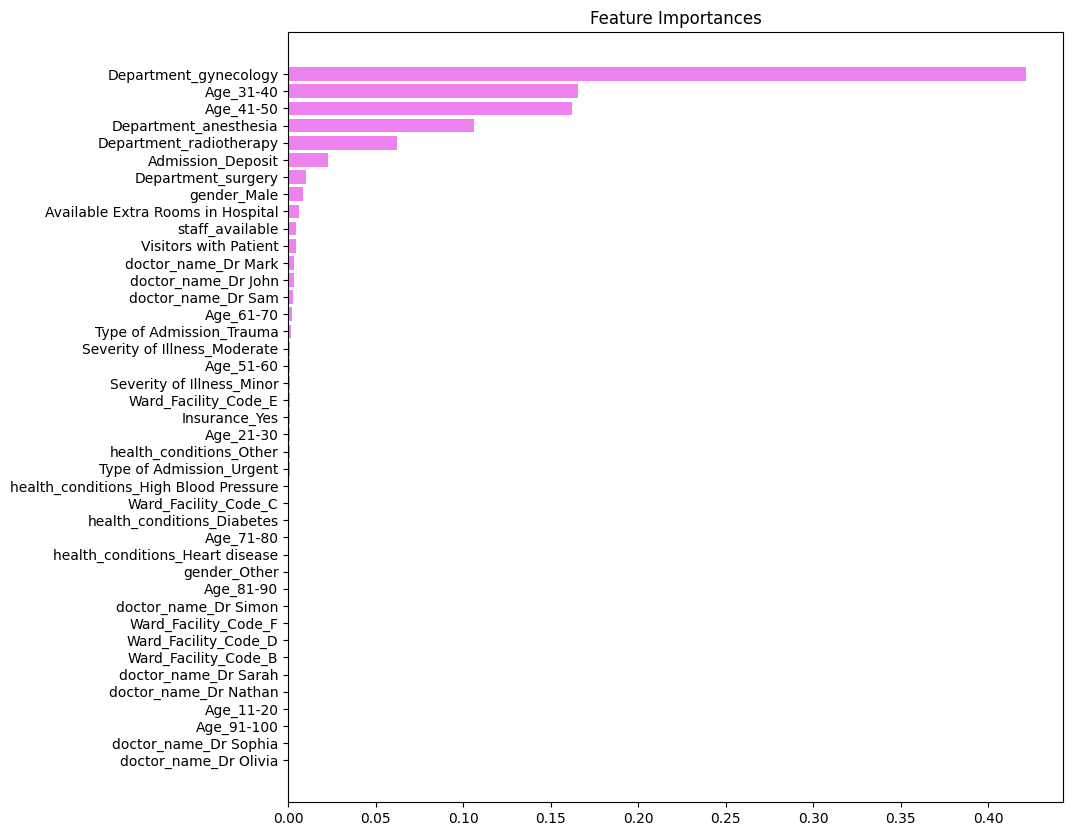

In [57]:
importances = rf_tuned_regressor.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(features)), importances[indices], color='violet', align='center')
plt.yticks(range(len(features)), [features[i] for i in indices]);

# **Conclusion**

**- The insights gained from a Random Forest model can have significant managerial implications, particularly in resource allocation and planning. For example, if the model identifies that certain wards, such as A, C, and E, have longer lengths of stay due to surgeries, hospital management can allocate more resources to these wards to handle overcapacity. Additionally, understanding that the department of gynecology and certain age brackets are key determinants of length of stay can help in planning and optimizing hospital operations. These insights enable data-driven decision-making, improving efficiency and patient care.**   

**- A Random Forest model can be used to predict the length of stay for patients in a hospital with high precision. By training the model on historical data, it can achieve a mean absolute error precision of 0.86 days. This allows hospitals to predict how long a new patient is likely to stay, enabling them to plan resources and staff accordingly. For instance, if a patient is predicted to stay for 30 days, the hospital can prepare in advance, ensuring that the necessary resources and staff are available. This predictive capability enhances operational efficiency and patient care.**

